In [1]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [2]:
# Importing self-made libaries

import reload_lib as rl
import sensitivity as st
import life_cycle_assessment as lc
import lcia_results as lr
import non_bio_co2 as nbc
import standards as s
import import_ecoinvent_and_databases as ied
import results_figures as rfig
import sensitivity_case1 as sc1
import sensitivity_case2 as sc2


lib = [lc, lr, nbc, s, ied, rfig, st, sc1, sc2]
rl.reload_lib(lib)

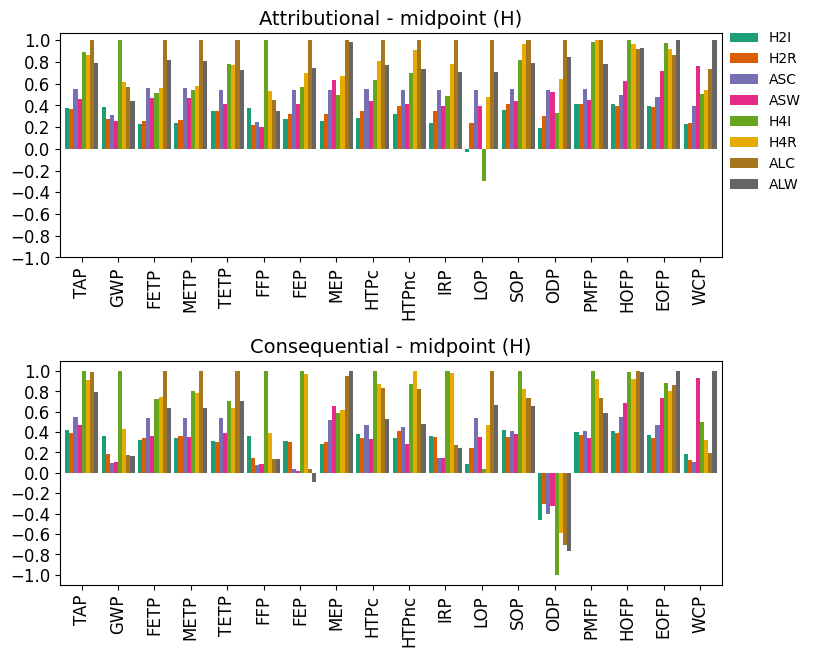

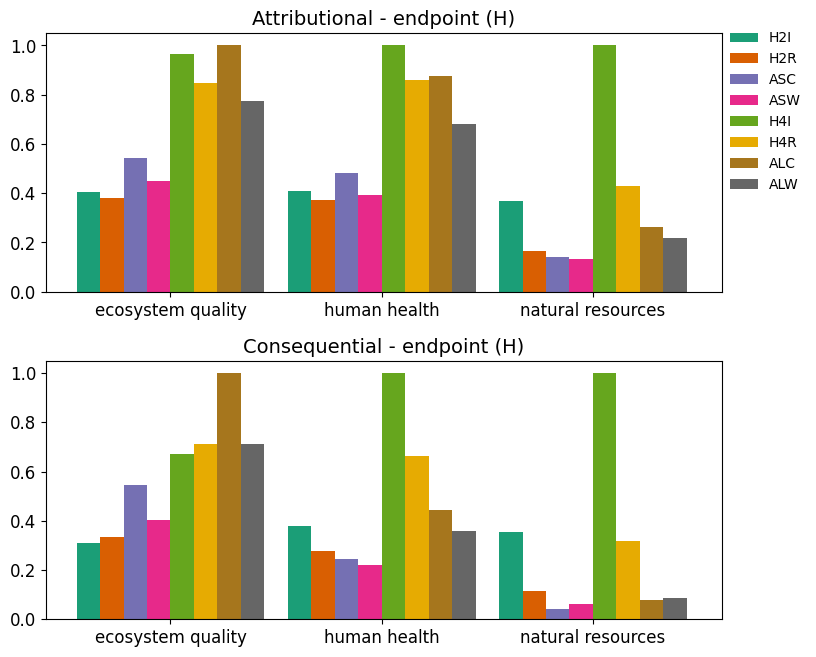

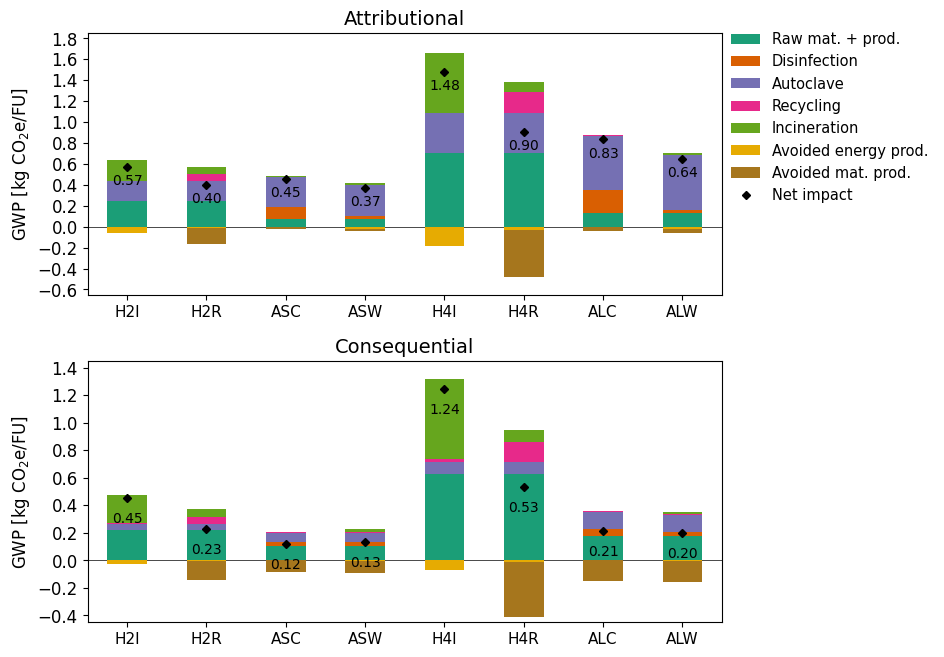

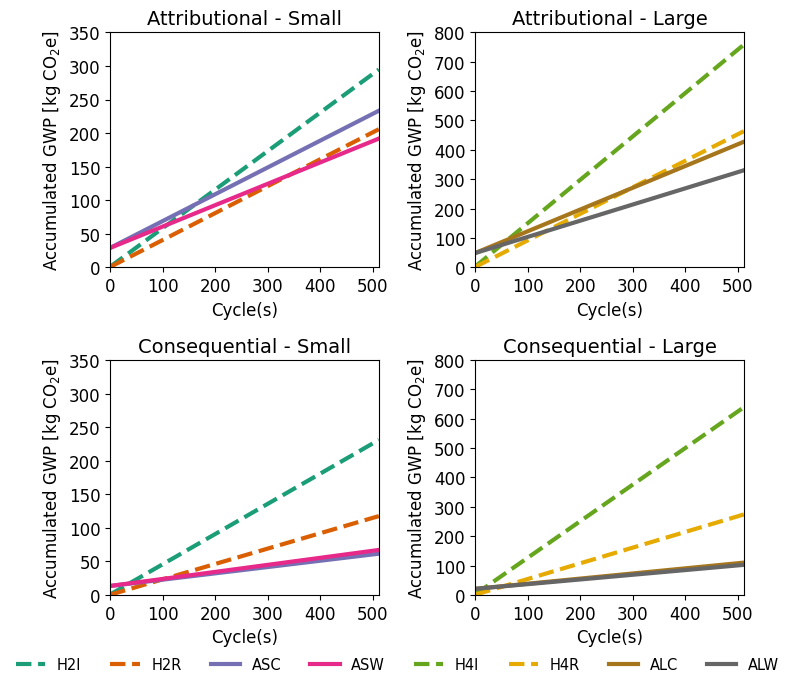

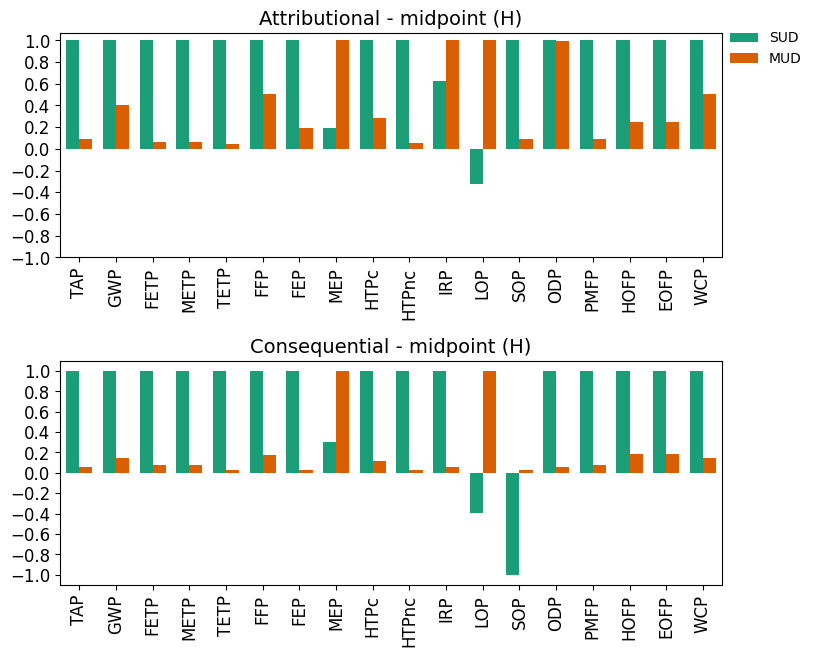

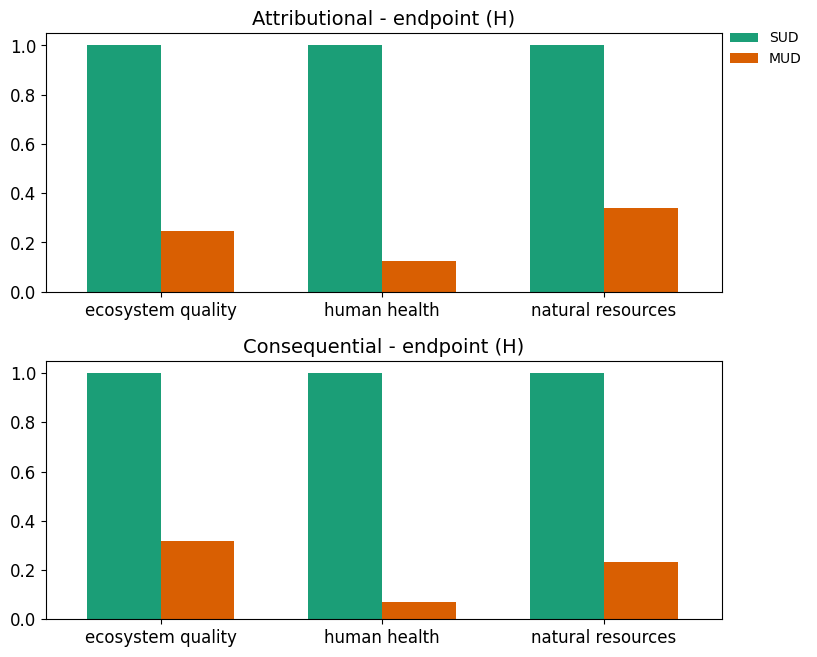

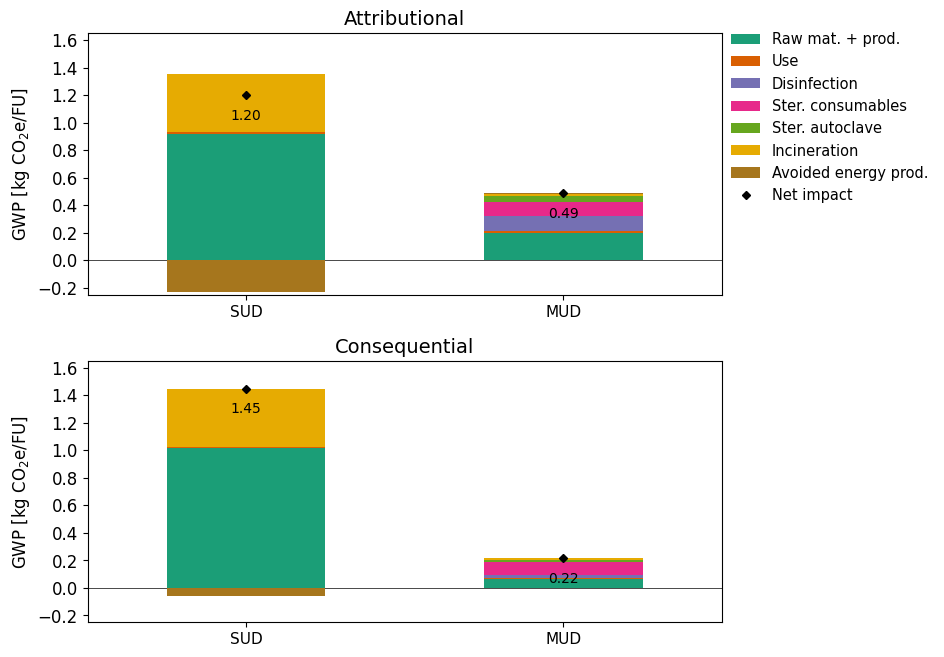

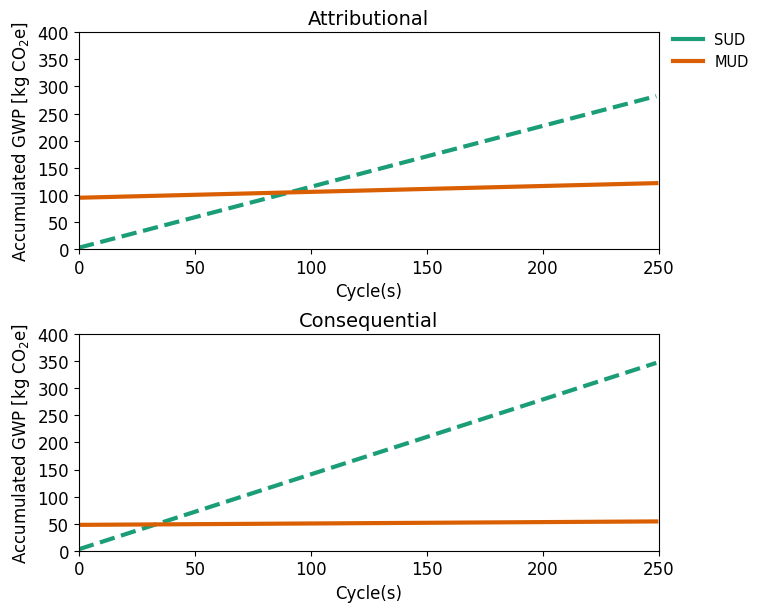

In [3]:
rl.reload_lib(lib)
path = r'C:/Users/ruw/Desktop'
path_github, ecoinevnt_paths, system_path = s.paths(path)
case = ['case1', 'case2']
data = {}
for c in case:
    data = rfig.create_results_figures(c, path_github, ecoinevnt_paths, system_path, redo=False, reload=False) # Calculating the results and creating the figures
    # data[c] = st.iterative_save_sensitivity_results_to_excel(path_github, c) # Performing the sensitivity analysis


In [4]:
data["case1"]["case1_cut_off"][3]

,Raw mat. + prod.,Disinfection,Autoclave,Recycling,Incineration,Avoided energy prod.,Avoided mat. prod.
H2S,0.247601,0.0,0.186699,0.000188,0.20307,-0.064214,0.0
H2R,0.247601,0.0,0.186699,0.073982,0.060215,-0.009632,-0.15855
ASC,0.076631,0.10834,0.29042,0.003663,0.00075,-0.000081,-0.024898
ASW,0.076631,0.028772,0.29042,0.003663,0.016759,-0.017451,-0.024898
H4S,0.708573,0.0,0.373397,0.000577,0.576319,-0.183713,0.0
H4R,0.708573,0.0,0.373397,0.209312,0.087228,-0.027557,-0.449153
ALC,0.129442,0.21668,0.522756,0.006078,0.000375,-0.000162,-0.041721
ALW,0.129442,0.028772,0.522756,0.006078,0.016384,-0.017532,-0.041721


In [5]:
res_path = s.join_path(path_github, "results")

In [6]:
def lifetime(key, idx):
    if "1" in key and "A" in idx:
        return 513
    elif "2" in key and "MUD" in idx:
        return 250
    else:
        return 1

In [ ]:
be_dct = {}
for case, db_type in data.items():
    for key, df_lst in db_type.items():
        df = df_lst[3]
        temp_dct = {}
        be_dct[key] = {}
        tmp = {}
        for idx, row in df.iterrows():
            temp_dct["use"] = 0
            temp_dct["prod"] = 0
            tmp[idx] = {}
            for col in df.columns:
                # print(col, idx)
                if col == df.columns[1] or col == df.columns[2]:
                    temp_dct["use"] += row[col]
                    # print(col, idx, row[col], temp_dct["use"])
                
                else:
                    temp_dct["prod"] +=( row[col] * lifetime(key, idx))
            tmp[idx].update(temp_dct)
            be_dct[key].update(tmp)



{'SUD': {'use': 0.003338416857872192, 'prod': 1.3791133681086374},
 'MUD': {'use': 0.028814305279730106, 'prod': 46.91583100531528}}

In [8]:
def case1_obtain_be_values(dct, be_val):
    SU = {
        "small" : ["H2S", "H2R"],
        "large" : ["H4S", "H4R"]}

    MU = {
        "small" : ["ASC", "ASW"],
        "large" : ["ALC", "ALW"]}
    
    for size, lst in SU.items():
        for sc_su in lst:
            for sc_mu in MU[size]:
                su_use = dct[sc_su]["use"]
                su_prod = dct[sc_su]["prod"]
                mu_use = dct[sc_mu]["use"]
                mu_prod = dct[sc_mu]["prod"]
                # print(su_use, su_prod, mu_use, mu_prod)
                for day in range(1,10000):
                    su_impact = (su_use + su_prod) * day
                    mu_impact = mu_use * day + mu_prod
                    if mu_impact < su_impact:
                        be_val[key].update({f"{sc_mu} to {sc_su}" : day})
                        break

In [9]:
def obtain_be_values(be_dct):
    be_val = {}
    for key, dct in be_dct.items():
        
        be_val[key] = {}
        if "case1" in key:
            case1_obtain_be_values(dct, be_val)
        else:
            su_use = dct["SUD"]["use"]
            su_prod = dct["SUD"]["prod"]
            mu_use = dct["MUD"]["use"]
            mu_prod = dct["MUD"]["prod"]
            for day in range(1,10000):
                su_impact = (su_use + su_prod) * day
                mu_impact = mu_use * day + mu_prod
                if mu_impact < su_impact:
                    be_val[key].update({f"MUD to SUD" : day})
                    break

In [10]:
be_val = {}
for key, dct in be_dct.items():
    
    be_val[key] = {}
    if "case1" in key:
        case1_obtain_be_values(dct, be_val)
    else:
        su_use = dct["SUD"]["use"]
        su_prod = dct["SUD"]["prod"]
        mu_use = dct["MUD"]["use"]
        mu_prod = dct["MUD"]["prod"]
        for use in range(1,10000):
            su_impact = (su_use + su_prod) * use
            mu_impact = mu_use * use + mu_prod
            if mu_impact < su_impact:
                be_val[key].update({f"MUD to SUD" : use})
                break


In [11]:
import pandas as pd

In [17]:
dct = be_val["case1_consq"]
df = pd.DataFrame(dct.values(), index=dct.keys(), columns=["Uses to break even"])
df

,Uses to break even
ASC to H2S,38
ASW to H2S,52
ASC to H2R,99
ASW to H2R,137
ALC to H4S,20
ALW to H4S,24
ALC to H4R,58
ALW to H4R,67


In [ ]:
with pd.ExcelWriter(lci_table_path, engine='xlsxwriter') as writer:
    for act, df in dct.items():
        sheet_name = act
        if len(act) > 30:
            sheet_name = act[:29] + " " + act[-1]
        df.to_excel(writer, sheet_name=sheet_name, index=False)